### Yapay Sinir Ağları:  

Yüksek sayıda sütuna sahip verilerle çalışırken, yapay sinir ağı modelleri, genellikle çok sayıda gizli katmanla kullanılır. Bu gizli katmanlar, veriler arasındaki ilişkileri daha iyi yakalamak için kullanılır.  

Bunun yanı sıra, veri setimizin boyutu büyük olduğu için, batch gradient descent yerine mini-batch veya stochastic gradient descent yöntemlerini kullanmalıyız. Bu, daha hızlı eğitim süreleri ve daha az bellek kullanımı sağlayabilir.

In [1]:
import pandas as pd 
import numpy as np 

train = pd.read_csv('../ML-DL Datasets/train.csv')
train.head(4)

,user_id,industry,location,moved_after_2019,ITU,YTU,anadolu_üniversitesi,diğer_school,ege_üniversitesi,hacettepe_üniversitesi,...,Software Development,Software Engineering,Spring Framework,Teamwork,Visual Studio,Web Development,XML,jQuery,other,skill_count
0,1301,Information Technology,istanbul,1,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0
1,6950,Information Technology,istanbul,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,49.0
2,4880,Others,diğer,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,21.0
3,26046,Information Technology,istanbul,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0


In [2]:
spec_cols = ['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count', 'industry', 'location']
train[spec_cols].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count,industry,location
0,2.0,92.0,4.0,2.0,23.0,Information Technology,istanbul
1,1.0,117.0,6.0,3.0,49.0,Information Technology,istanbul
2,2.0,108.0,4.0,0.0,21.0,Others,diğer
3,3.0,160.0,4.0,1.0,30.0,Information Technology,istanbul
4,2.0,160.0,3.0,2.0,48.0,Financial Services,istanbul


In [3]:
# scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [4]:
train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']] = sc.fit_transform(train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']])
train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count
0,-0.132132,-0.147686,0.487529,0.696960,0.140200
1,-1.002056,0.208104,1.384526,1.516626,2.018894
2,-0.132132,0.080019,0.487529,-0.942370,-0.004315
3,0.737792,0.820063,0.487529,-0.122705,0.646002
4,-0.132132,0.820063,0.039031,0.696960,1.946637


In [5]:
# label encoder
from sklearn.preprocessing import LabelEncoder
industry_le = LabelEncoder()
location_le = LabelEncoder()

In [6]:
train['industry'] = industry_le.fit_transform(train['industry'])
train['location'] = location_le.fit_transform(train['location'])
train[['industry', 'location']].head()

,industry,location
0,11,8
1,11,8
2,16,5
3,11,8
4,8,8


In [7]:
train[spec_cols].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count,industry,location
0,-0.132132,-0.147686,0.487529,0.696960,0.140200,11,8
1,-1.002056,0.208104,1.384526,1.516626,2.018894,11,8
2,-0.132132,0.080019,0.487529,-0.942370,-0.004315,16,5
3,0.737792,0.820063,0.487529,-0.122705,0.646002,11,8
4,-0.132132,0.820063,0.039031,0.696960,1.946637,8,8


In [8]:
train = train.drop(['user_id'], axis=1)
X = train.drop(['moved_after_2019'], axis=1)
y = train[['moved_after_2019']]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(58, input_dim=X_train.shape[1], activation='relu'))
classifier.add(Dense(29, activation='relu'))
classifier.add(Dense(12, activation='relu'))
classifier.add(Dense(8, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = classifier.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

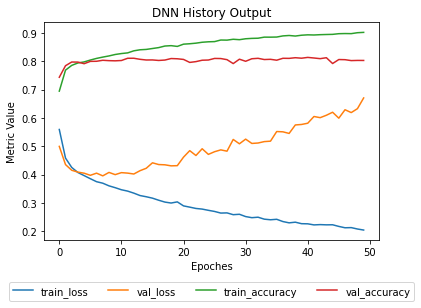

In [12]:
import matplotlib.pyplot as plt 

%matplotlib inline

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=5)
plt.title("DNN History Output")
plt.xlabel('Epoches')
plt.ylabel('Metric Value')
plt.savefig('../Images/DNN_output.png')
plt.show()

In [13]:
dnn_predictions = classifier.predict(X_test)

415/415 [==============================] - 1s 1ms/step


In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, dnn_predictions)
auc = roc_auc_score(y_test, dnn_predictions)

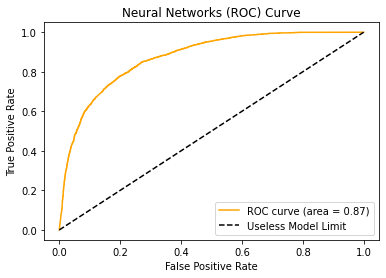

In [15]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Networks (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/Neural_Networks_ROC.png')
plt.show()

<hr>

In [16]:
from keras.layers import Dropout

classifier2 = Sequential()

classifier2.add(Dense(232, input_dim=X_train.shape[1], activation='relu'))
classifier2.add(Dropout(0.6))
classifier2.add(Dense(116, activation='relu'))
classifier2.add(Dropout(0.5))
classifier2.add(Dense(58, activation='relu'))
classifier2.add(Dropout(0.3))
classifier2.add(Dense(29, activation='relu'))
classifier2.add(Dropout(0.1))
classifier2.add(Dense(12, activation='relu'))
classifier2.add(Dense(8, activation='relu'))
classifier2.add(Dense(1, activation='sigmoid'))

classifier2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history2 = classifier2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

In [18]:
dnn_predictions2 = classifier2.predict(X_test)

415/415 [==============================] - 1s 1ms/step


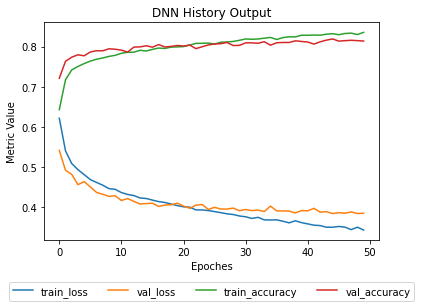

In [19]:
%matplotlib inline

plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=5)
plt.title("DNN History Output")
plt.xlabel('Epoches')
plt.ylabel('Metric Value')
plt.savefig('../Images/DNN_output2.png')
plt.show()

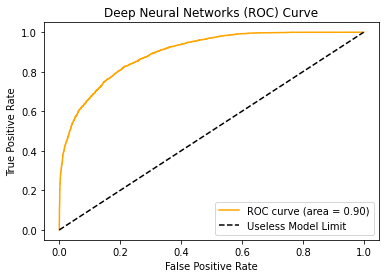

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, dnn_predictions2)
auc = roc_auc_score(y_test, dnn_predictions2)

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Deep Neural Networks (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/Neural_Networks_2_ROC.png')
plt.show()

<hr>

In [21]:
classifier3 = Sequential()

classifier3.add(Dense(232, input_dim=X_train.shape[1], activation='relu', kernel_initializer='uniform'))
classifier3.add(Dropout(0.7))
classifier3.add(Dense(116, activation='relu'))
classifier3.add(Dropout(0.2))
classifier3.add(Dense(58, activation='sigmoid'))
classifier3.add(Dropout(0.5))
classifier3.add(Dense(29, activation='relu'))
classifier3.add(Dropout(0.1))
classifier3.add(Dense(12, activation='relu'))
classifier3.add(Dense(8, activation='relu'))
classifier3.add(Dense(3, activation='relu'))
classifier3.add(Dense(1, activation='sigmoid'))

classifier3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history3 = classifier3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

In [23]:
dnn_predictions3 = classifier3.predict(X_test)

415/415 [==============================] - 1s 1ms/step


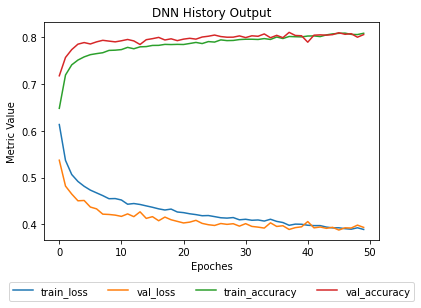

In [24]:
%matplotlib inline

plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.plot(history3.history['accuracy'], label='train_accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=5)
plt.title("DNN History Output")
plt.xlabel('Epoches')
plt.ylabel('Metric Value')

plt.savefig('../Images/DNN_output3.png')
plt.show()

<hr>

In [26]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, np.round(dnn_predictions), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.831148,0.743074,0.797812,0.787111,0.797134
recall,0.841568,0.728267,0.797812,0.784918,0.797812
f1-score,0.836326,0.735596,0.797812,0.785961,0.797425
support,8136.000000,5119.000000,0.797812,13255.000000,13255.000000


In [27]:
pd.DataFrame(classification_report(y_test, np.round(dnn_predictions2), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.843518,0.762540,0.812825,0.803029,0.812245
recall,0.853368,0.748388,0.812825,0.800878,0.812825
f1-score,0.848414,0.755398,0.812825,0.801906,0.812492
support,8136.000000,5119.000000,0.812825,13255.000000,13255.000000


In [28]:

pd.DataFrame(classification_report(y_test, np.round(dnn_predictions3), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.834696,0.744168,0.800151,0.789432,0.799734
recall,0.840954,0.735300,0.800151,0.788127,0.800151
f1-score,0.837813,0.739707,0.800151,0.788760,0.799925
support,8136.000000,5119.000000,0.800151,13255.000000,13255.000000


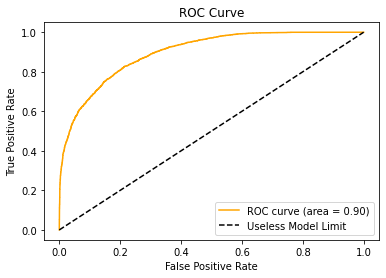

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(np.ravel(y_test), dnn_predictions2)
auc = roc_auc_score(np.ravel(y_test), dnn_predictions2)

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

In [31]:
classifier2.save('../Boosts/SavedModels/DNN.h5')